In [11]:

## Climate Farmers test code for applying NVDI and SAVI
## This program should prompt the user for the red and infrared images, apply a simple cropping technique and
## calculate the NVDI and SAVI for a given image set

#Libraries used:
#MatplotLib: 
# python -m pip install -U matplotlib
# https://matplotlib.org/
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#makes the images display inside this notebook:
%matplotlib inline 
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import matplotlib.collections as collections
import matplotlib.patches as patches
from PIL import Image

#tkinter to support gui dialogue boxes, etc
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from tkinter.simpledialog import askinteger

#Numpy
import numpy as np

##SentinelSat 
## pip install sentinelsat
#sentinelsat -u <user> -p <password> -g <search_polygon.geojson> --sentinel 2 --cloud 30
#from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
#api = SentinelAPI('user', 'password', 'https://scihub.copernicus.eu/dhus')

#datetime
import datetime
from datetime import date


##Future Work: Check for libraries

In [2]:
## Future work: Prompt user for location & date
# https://developers.google.com/maps/documentation/geocoding/overview

#an example using an address
#import requests
#response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA')
#resp_json_payload = response.json()
#print(resp_json_payload['results'][0]['geometry']['location'])

#case study
#**Name:** 			        Ackerpulco
#**Link:**			        http://ackerpulco-farm.de/
#**Location:**			    Schlossstraße 5, 15518, Alt-Madlitz, Germany
#**Coordinates:**		    52.37962462071622, 14.280646369492525 --- 52°22'46.7"N 14°16'50.3"E


In [ ]:
## Future work: API to check if data is in database, if not download it,
# 
# use this for sentinal: https://pypi.org/project/sentinelsat/
# keywords etc for query: https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/FullTextSearch?redirectedfrom=SciHubUserGuide.3FullTextSearch




In [7]:
##request red image

print("To apply NDVI, please select a Red Image (0.55–0.70 micrometers):")

## uncomment the lines below to get a 'browse for file' window, otherwise hardcode the link below
#from tkinter import*
## Create Tk root
#root = Tk()
## Hide the main window
#root.withdraw()
#root.call('wm', 'attributes', '.', '-topmost', True)

#from tkinter import filedialog
#infiles = filedialog.askopenfilename(multiple=True)

#%gui tk


redImageOriginal = mpimg.imread("""C:/Users/clair/Climate Farmers/Climate-Farmers-Logo-Vertical.png""")



To apply NDVI, please select a Red Image (0.55–0.70 micrometers):


In [6]:
## Request near Infrared Image
print("And a Near Infrared Image (0.73–1.0 micrometers):")


## uncomment the lines below to get a 'browse for file' window, otherwise hardcode the link below
#from tkinter import*
## Create Tk root
#root = Tk()
## Hide the main window
#root.withdraw()
#root.call('wm', 'attributes', '.', '-topmost', True)

#from tkinter import filedialog
#infiles = filedialog.askopenfilename(multiple=True)

#%gui tk

infraredImageOriginal = mpimg.imread("""C:/Users/clair/Climate Farmers/LC08_L1TP_014031_20210303_20210303_01_RT/LC08_L1TP_014031_20210303_20210303_01_RT/LC08_L1TP_014031_20210303_20210303_01_RT_B5.TIF""")



And a Near Infrared Image (0.73–1.0 micrometers):


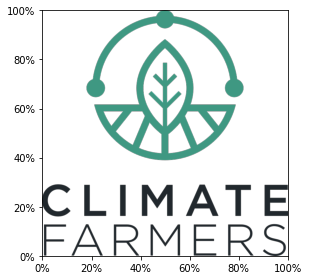

In [8]:
#Preview Image
#redImageOriginal = mpimg.imread('""C:\Users\clair\Climate Farmers\L8_041036_20180831.png""')
fig = plt.figure(figsize=(18, 4))

plt.imshow(redImageOriginal, extent=(0,100,0,100))

plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()


In [9]:
#Crop Image (in place of propper selection tool) Part 1:



percTop=int(input("Top Boundary Percentage:"))

percLeft=int(input("Left Boundary Percentage:"))

percRight=int(input("Right Boundary Percentage:"))

percBottom=int(input("Bottom Boundary Percentage:"))


If the cropped area isnt quite right, adjust the percentages in the cell above.


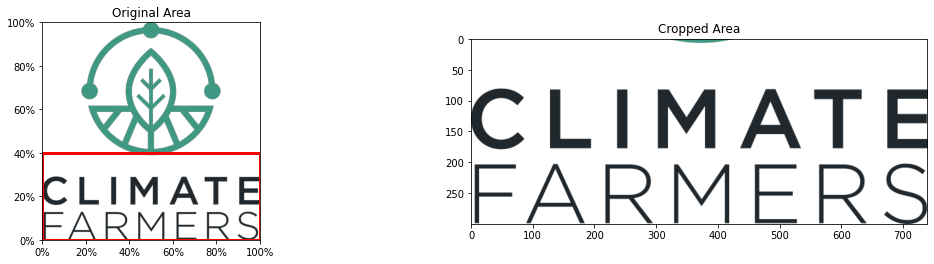

In [23]:
#Crop Image (in place of proper selection tool) Part 2:

#get current image dimensions
height=redImageOriginal.shape[0]
width=redImageOriginal.shape[1]

#apply percentages entered by user to find new dimensions
croppedTop=height-round(percTop*height/100)
croppedLeft=round(percLeft*height/100)
croppedRight=width-round(percRight*height/100)
croppedBottom=height-round(percBottom*height/100)

#crop the image
redCropped= redImageOriginal[croppedTop:croppedBottom, croppedLeft:croppedRight]

# Display Images
f, axarr = plt.subplots(1,2,figsize=(18, 4)) #sets up two images side by side
axarr[0].title.set_text('Original Area')
axarr[0].imshow(redImageOriginal, extent=(0,100,0,100))

# Draw a box around selected area
rect = patches.Rectangle((percLeft, percTop), percRight-percLeft, percBottom-percTop, linewidth=3, edgecolor='r', facecolor='none')
axarr[0].add_patch(rect)

#put the axis in percentages
axarr[0].xaxis.set_major_formatter(PercentFormatter(decimals=0))
axarr[0].yaxis.set_major_formatter(PercentFormatter(decimals=0))
axarr[1].title.set_text('Cropped Area')
axarr[1].imshow(redCropped)

print('If the cropped area isnt quite right, adjust the percentages in the cell above.')

In [ ]:
#Apply same crop to infrared image

infraredCropped= infraredImageOriginal[croppedTop:croppedBottom, croppedLeft:croppedRight]

In [85]:
#Apply NDVI to region of interest
#NDVI = (infraredCropped — redCropped)/(infraredCropped + redCropped)

#imgplot = plt.imshow(NDVI)
#plt.colorbar()

print("NDVI = (NIR — VIS)/(NIR + VIS)")

print("Calculations of NDVI for a given pixel always result in a number that ranges from minus one (-1) to plus one (+1); however, no green leaves gives a value close to zero. A zero means no vegetation and close to +1 (0.8 - 0.9) indicates the highest possible density of green leaves.")

print("from https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php.")





NDVI = (NIR — VIS)/(NIR + VIS)
Calculations of NDVI for a given pixel always result in a number that ranges from minus one (-1) to plus one (+1); however, no green leaves gives a value close to zero. A zero means no vegetation and close to +1 (0.8 - 0.9) indicates the highest possible density of green leaves.
from https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php.


In [26]:
#SAVI
L= 0.5
#SAVI = ((infraredCropped — redCropped)*(1+L))/(infraredCropped + redCropped + L)

print("SAVI = ((NIR - VIS x (1 + L))/(NIR + VIS + L)")

#jupyter should support latex formatting, but I havent got it it to work yet

print("SAVI is used to correct Normalized Difference Vegetation Index (NDVI) for the influence of soil brightness in areas where vegetative cover is low. Landsat Surface Reflectance-derived SAVI is calculated as a ratio between the R and NIR values with a soil brightness correction factor (L) defined as 0.5 to accommodate most land cover types.")

print("from https://www.usgs.gov/core-science-systems/nli/landsat/landsat-soil-adjusted-vegetation-index")

SyntaxError: invalid syntax (<ipython-input-26-7a4adf9f4d2f>, line 7)